<a href="https://colab.research.google.com/github/annvorosh/GB/blob/ML_Med/ML_Med_L01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ - поработать с датасетом болезней соевых бобов по адресу http://archive.ics.uci.edu/ml/datasets/Soybean+%28Large%29
1. построить три модели ML, целевой скор f1 >= 0.8 или AUC ROC >= 0.8,

2. визуализировать графики обучения,
3. отобразить истину и предсказания на тесте в 2 и 3 мерных пространствах.
В работе должны быть выводы и желательно навигация.
Сдавать либо Гитхаб либо Google Colab.

## Загрузка данных и библиотек

In [123]:
!pip install ucimlrepo

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.model_selection import learning_curve

In [125]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
soybean_large = fetch_ucirepo(id=90)

# data (as pandas dataframes)
X = soybean_large.data.features
y = soybean_large.data.targets

In [126]:
# metadata
# print(soybean_large.metadata)

# variable information
# print(soybean_large.variables)

## Обзор и предобработка данных

In [127]:
# Создание DataFrame
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,target
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,diaporthe-stem-canker


In [128]:
df.shape

(307, 36)

In [129]:
df.describe()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,306.000000,299.000000,296.000000,300.000000,266.000000,306.000000,306.000000,266.000000,266.000000,271.000000,...,296.000000,296.000000,282.000000,272.000000,278.000000,278.000000,272.000000,278.000000,272.000000,300.000000
mean,3.529412,0.464883,1.577703,1.130000,0.206767,1.816993,1.633987,0.778195,0.548872,1.014760,...,0.135135,0.033784,0.549645,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,0.156667
std,1.712285,0.499601,0.713580,0.622676,0.405750,0.994661,1.078868,0.620145,0.632052,0.798009,...,0.430193,0.180978,0.965241,1.575944,0.387736,0.315331,0.304442,0.296658,0.235728,0.423541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### Дисбаланс данных

In [130]:
# Подсчет количества объектов для каждого класса
class_counts = df['target'].value_counts()
class_counts

target
frog-eye-leaf-spot             40
phytophthora-rot               40
alternarialeaf-spot            40
brown-spot                     40
brown-stem-rot                 20
anthracnose                    20
diaporthe-stem-canker          10
purple-seed-stain              10
phyllosticta-leaf-spot         10
bacterial-pustule              10
charcoal-rot                   10
bacterial-blight               10
downy-mildew                   10
powdery-mildew                 10
rhizoctonia-root-rot           10
diaporthe-pod-&-stem-blight     6
cyst-nematode                   6
herbicide-injury                4
2-4-d-injury                    1
Name: count, dtype: int64

In [131]:
# Обзор пропусков
df[df.isnull().any(axis=1)]

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,target
31,1.0,1.0,2.0,1.0,NaN,3.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
32,2.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
34,2.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
35,3.0,1.0,2.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
38,2.0,1.0,1.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
40,2.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
41,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
45,2.0,1.0,2.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
47,2.0,1.0,1.0,2.0,NaN,2.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot
51,1.0,1.0,2.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,phytophthora-rot


diaporthe-pod-&-stem-blight, cyst-nematode, herbicide-injury и 2-4-d-injury содержат пропущенные значения во всех объектах. Следовательно, можно рассмотреть удаление этих классов из анализа.

In [132]:
# df.iloc[296] # посмотрим любую строку с пропускам

Так как в каждой строке с пропусками слишком много пропущенных значений, то, думаю, что заполнение этих пропусков может сильно искозить модель, поэтому принято решение от таких объектов избавиться

In [140]:
classes_to_remove = ["diaporthe-pod-&-stem-blight", "cyst-nematode", "herbicide-injury", "2-4-d-injury"]
df = df[~df['target'].isin(classes_to_remove)]

In [141]:
# Обзор пропусков
df[df.isnull().any(axis=1)]

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,target


Тут тоже слишком много пропусков, поэтому удалим эти объекты

In [142]:
df = df.dropna()

# Обзор пропусков
df[df.isnull().any(axis=1)]

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,target


In [144]:
# Подсчет количества объектов для каждого класса
df['target'].value_counts()

target
brown-spot                40
alternarialeaf-spot       40
frog-eye-leaf-spot        40
brown-stem-rot            20
anthracnose               20
phytophthora-rot          16
diaporthe-stem-canker     10
charcoal-rot              10
rhizoctonia-root-rot      10
powdery-mildew            10
downy-mildew              10
bacterial-blight          10
bacterial-pustule         10
purple-seed-stain         10
phyllosticta-leaf-spot    10
Name: count, dtype: int64

### Вычисление матрицы корреляции

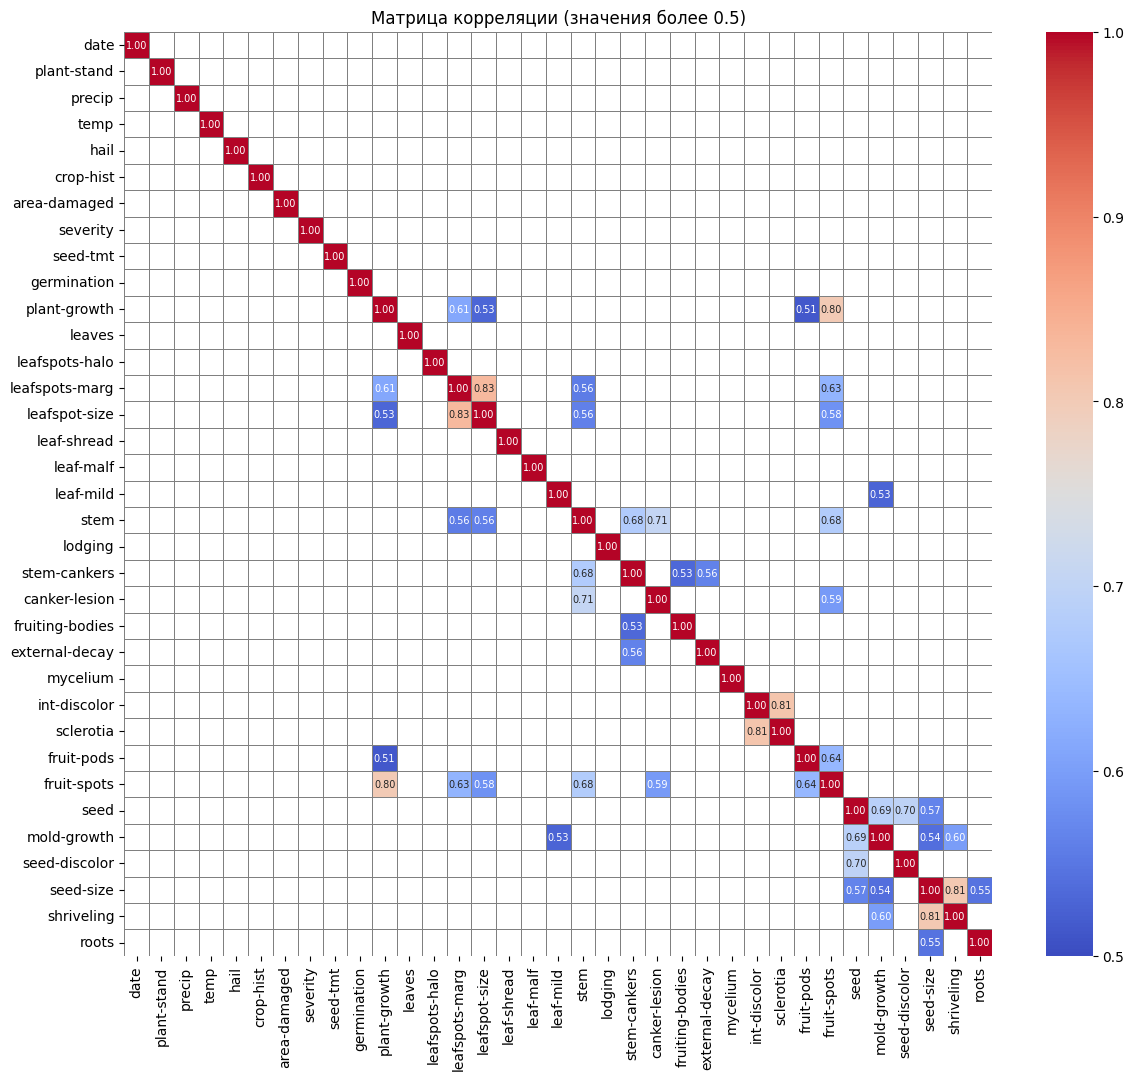

In [145]:
# Вычисление матрицы корреляции
correlation_matrix = X.corr()

# Отфильтровать значения корреляции более 0.5
correlation_matrix_filtered = correlation_matrix.mask(correlation_matrix <= 0.5)

# Создание тепловой карты
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_filtered,annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, linewidths=0.5, linecolor='gray', annot_kws={"size": 7})
plt.title('Матрица корреляции (значения более 0.5)')
plt.show()

Наиболее сильная корреляция:
- plant-growth и fruit-spots с корреляцией 0.8
- leafspots-marg и leafspots-size с корреляцией 0.6
- leafspot-size и stem с корреляцией 0.7
- canker-lesion и leafspots-marg с корреляцией 0.6
- mold-growth и seed с корреляцией 0.7
- seed-discolor и seed с корреляцией 0.7
- seed-size и mold-growth с корреляцией 0.5
- seed-size и shriveling с корреляцией 0.8
- seed-size и roots с корреляцией 0.5

### Удаление излишних фичей
Проанализировав матрицу корреляции приняли решение по удалению фичей:

In [149]:
df.drop(columns=['fruit-spots', 'leafspot-size', 'leafspots-marg', 'seed', 'seed-size', 'int-discolor', 'stem', 'external-decay', 'shriveling'], inplace=True)


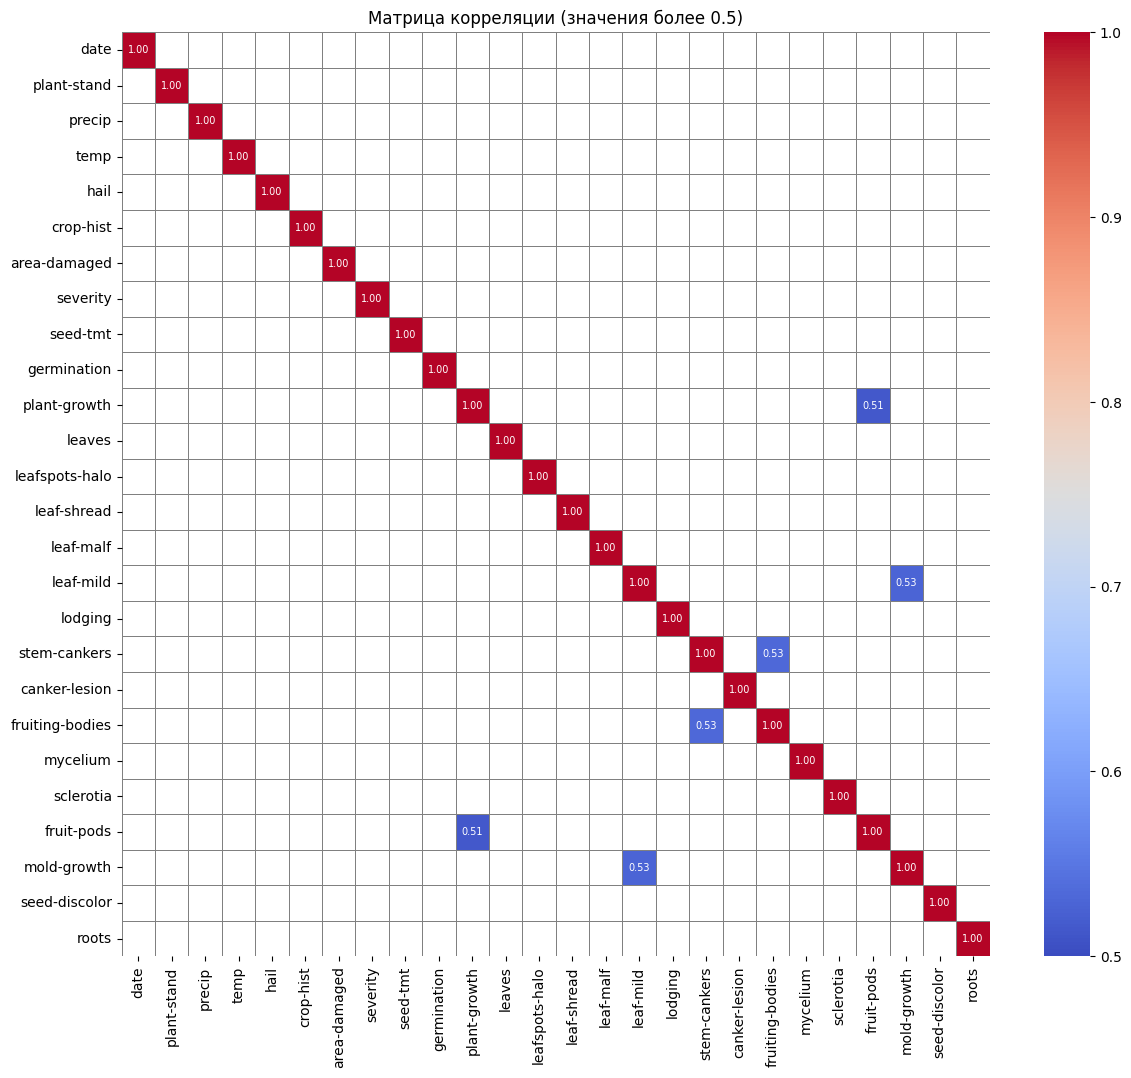

In [148]:
# Вычисление матрицы корреляции
correlation_matrix = X.corr()

# Отфильтровать значения корреляции более 0.5
correlation_matrix_filtered = correlation_matrix.mask(correlation_matrix <= 0.5)

# Создание тепловой карты
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_filtered,annot=True, cmap='coolwarm', fmt=".2f", vmin=0.5, linewidths=0.5, linecolor='gray', annot_kws={"size": 7})
plt.title('Матрица корреляции (значения более 0.5)')
plt.show()

### Разделим данные на тест и трейн

In [151]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['target'])
y = df['target']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [152]:
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

## Модели ML

### LogisticRegression

In [160]:
# Логистическая регрессия
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Логистическая регрессия")
print("Точность:", accuracy_log_reg)
print(classification_report(y_test, y_pred_log_reg))

Логистическая регрессия
Точность: 0.8333333333333334
                        precision    recall  f1-score   support

   alternarialeaf-spot       0.82      0.90      0.86        10
           anthracnose       1.00      1.00      1.00         1
      bacterial-blight       0.00      0.00      0.00         1
     bacterial-pustule       1.00      0.67      0.80         3
            brown-spot       0.89      0.73      0.80        11
        brown-stem-rot       0.67      1.00      0.80         2
          charcoal-rot       1.00      1.00      1.00         4
 diaporthe-stem-canker       1.00      1.00      1.00         2
          downy-mildew       1.00      1.00      1.00         1
    frog-eye-leaf-spot       0.86      0.86      0.86         7
phyllosticta-leaf-spot       0.40      1.00      0.57         2
      phytophthora-rot       1.00      1.00      1.00         3
        powdery-mildew       1.00      0.50      0.67         4
     purple-seed-stain       0.67      1.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier

In [161]:
# Модель 2: Дерево решений
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("\nДерево решений")
print("Точность:", accuracy_tree)
print(classification_report(y_test, y_pred_tree))



Дерево решений
Точность: 0.8148148148148148
                        precision    recall  f1-score   support

   alternarialeaf-spot       0.88      0.70      0.78        10
           anthracnose       1.00      1.00      1.00         1
      bacterial-blight       0.50      1.00      0.67         1
     bacterial-pustule       0.00      0.00      0.00         3
            brown-spot       0.90      0.82      0.86        11
        brown-stem-rot       0.67      1.00      0.80         2
          charcoal-rot       1.00      1.00      1.00         4
 diaporthe-stem-canker       1.00      1.00      1.00         2
          downy-mildew       0.50      1.00      0.67         1
    frog-eye-leaf-spot       0.62      0.71      0.67         7
phyllosticta-leaf-spot       0.50      1.00      0.67         2
      phytophthora-rot       1.00      1.00      1.00         3
        powdery-mildew       1.00      1.00      1.00         4
     purple-seed-stain       1.00      1.00      1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForestClassifier

In [162]:
# Модель 3: Случайный лес
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("\nСлучайный лес")
print("Точность:", accuracy_forest)
print(classification_report(y_test, y_pred_forest))


Случайный лес
Точность: 0.8518518518518519
                        precision    recall  f1-score   support

   alternarialeaf-spot       0.82      0.90      0.86        10
           anthracnose       1.00      1.00      1.00         1
      bacterial-blight       1.00      1.00      1.00         1
     bacterial-pustule       1.00      0.33      0.50         3
            brown-spot       0.90      0.82      0.86        11
        brown-stem-rot       0.67      1.00      0.80         2
          charcoal-rot       1.00      1.00      1.00         4
 diaporthe-stem-canker       1.00      1.00      1.00         2
          downy-mildew       1.00      1.00      1.00         1
    frog-eye-leaf-spot       0.83      0.71      0.77         7
phyllosticta-leaf-spot       0.40      1.00      0.57         2
      phytophthora-rot       1.00      1.00      1.00         3
        powdery-mildew       1.00      0.75      0.86         4
     purple-seed-stain       1.00      1.00      1.00      

## Построение кривых обучения для каждой модели

In [171]:
# Функция для построения кривых обучения
def plot_learning_curve(estimator, title, X, y):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, '.-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="b", label="Cross-validation score")

    plt.grid()
    plt.legend(loc="best")
    return plt


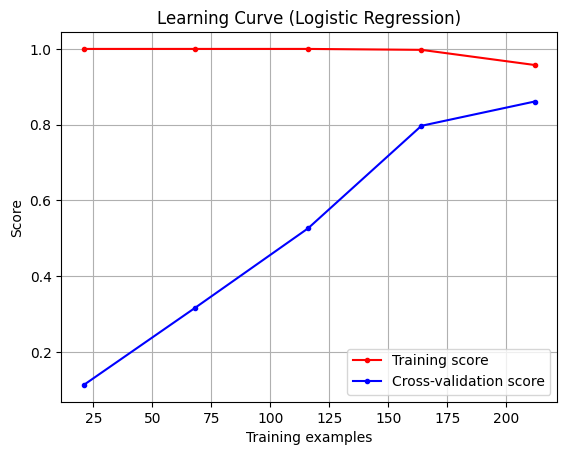

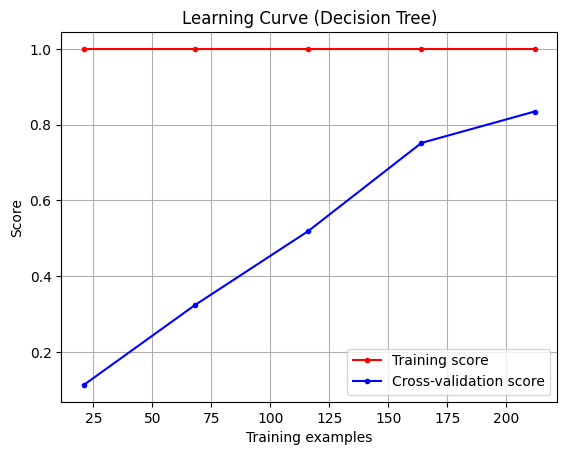

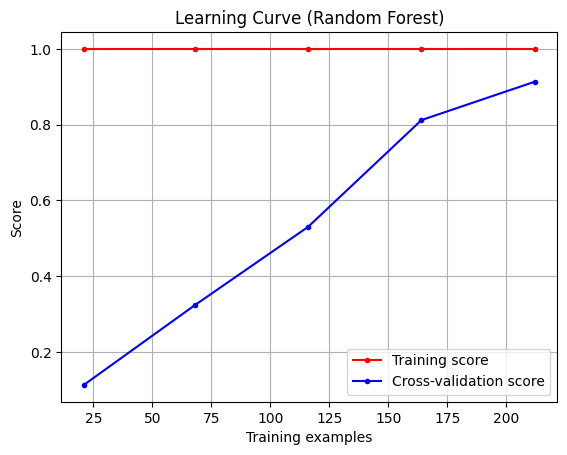

In [172]:
# Модель 1: Логистическая регрессия
plot_learning_curve(LogisticRegression(max_iter=10000), "Learning Curve (Logistic Regression)", X, y)

# Модель 2: Дерево решений
plot_learning_curve(DecisionTreeClassifier(random_state=42), "Learning Curve (Decision Tree)", X, y)

# Модель 3: Случайный лес
plot_learning_curve(RandomForestClassifier(random_state=42), "Learning Curve (Random Forest)", X, y)

plt.show()


Мы ясно видим, что Training score у Decision Tree и Random Forest все еще находится на максимуме, и результат проверки может быть увеличен с помощью большего количества тренировочных образцов.

## График с истинными и предсказанными значениями

In [179]:

df['target'].unique()


array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot'], dtype=object)

In [180]:
target_colors = {
    'diaporthe-stem-canker': 'blue',
    'charcoal-rot': 'orange',
    'rhizoctonia-root-rot': 'green',
    'phytophthora-rot': 'red',
    'brown-stem-rot': 'purple',
    'powdery-mildew': 'brown',
    'downy-mildew': 'pink',
    'brown-spot': 'gray',
    'bacterial-blight': 'cyan',
    'bacterial-pustule': 'magenta',
    'purple-seed-stain': 'lime',
    'anthracnose': 'yellow',
    'phyllosticta-leaf-spot': 'teal',
    'alternarialeaf-spot': 'olive',
    'frog-eye-leaf-spot': 'navy'
}

# Создаем массив цветов, соответствующих каждому значению целевой переменной
colors = [target_colors[target] for target in df['target']]

### LogisticRegression

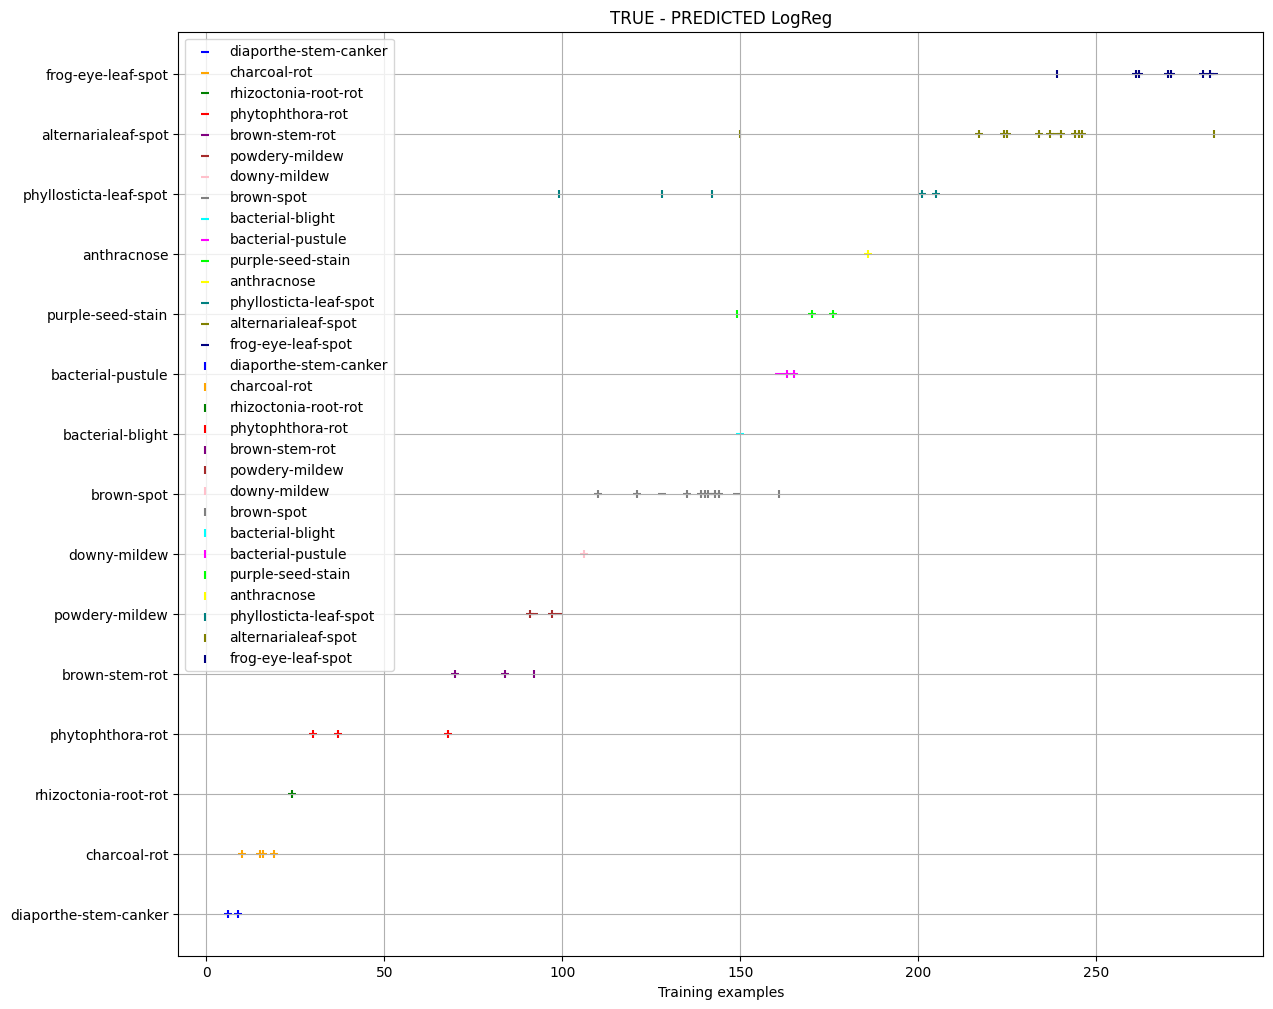

In [218]:

# Создаем DataFrame с истинными и предсказанными значениями
results = pd.DataFrame({'True': y_test, 'Predicted': y_pred_log_reg})

# Строим график рассеяния
plt.figure(figsize=(14, 12))
for target, color in target_colors.items():
    target_data = results[results['True'] == target]
    plt.scatter(target_data.index, target_data['True'], color=color, marker='_', label=target)

for target, color in target_colors.items():
    target_data = results[results['Predicted'] == target]
    plt.scatter(target_data.index, target_data['Predicted'], color=color, marker='|', label=target, )

plt.title('TRUE - PREDICTED LogReg')
plt.xlabel('Training examples')
plt.legend()
plt.grid()
plt.show()



### RandomForestClassifier

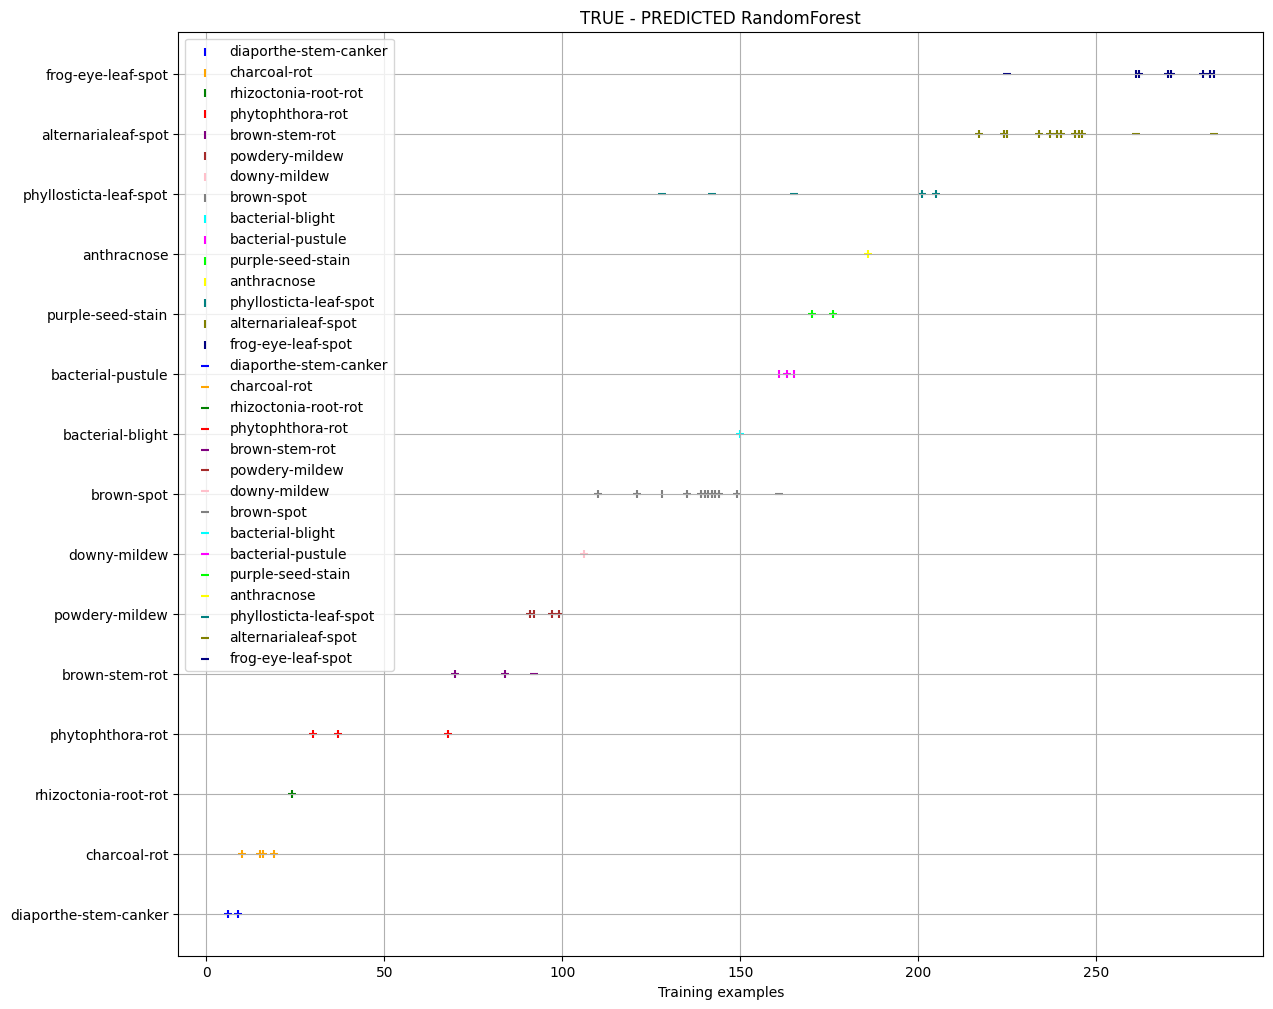

In [220]:
# Создаем DataFrame с истинными и предсказанными значениями
results = pd.DataFrame({'True': y_test, 'Predicted': y_pred_forest})

# Строим график рассеяния
plt.figure(figsize=(14, 12))
for target, color in target_colors.items():
    target_data = results[results['True'] == target]
    plt.scatter(target_data.index, target_data['True'], color=color, marker='|', label=target)

for target, color in target_colors.items():
    target_data = results[results['Predicted'] == target]
    plt.scatter(target_data.index, target_data['Predicted'], color=color, marker='_', label=target, )

plt.title('TRUE - PREDICTED RandomForest')
plt.xlabel('Training examples')
plt.legend()
plt.grid()
plt.show()


### DecisionTreeClassifier

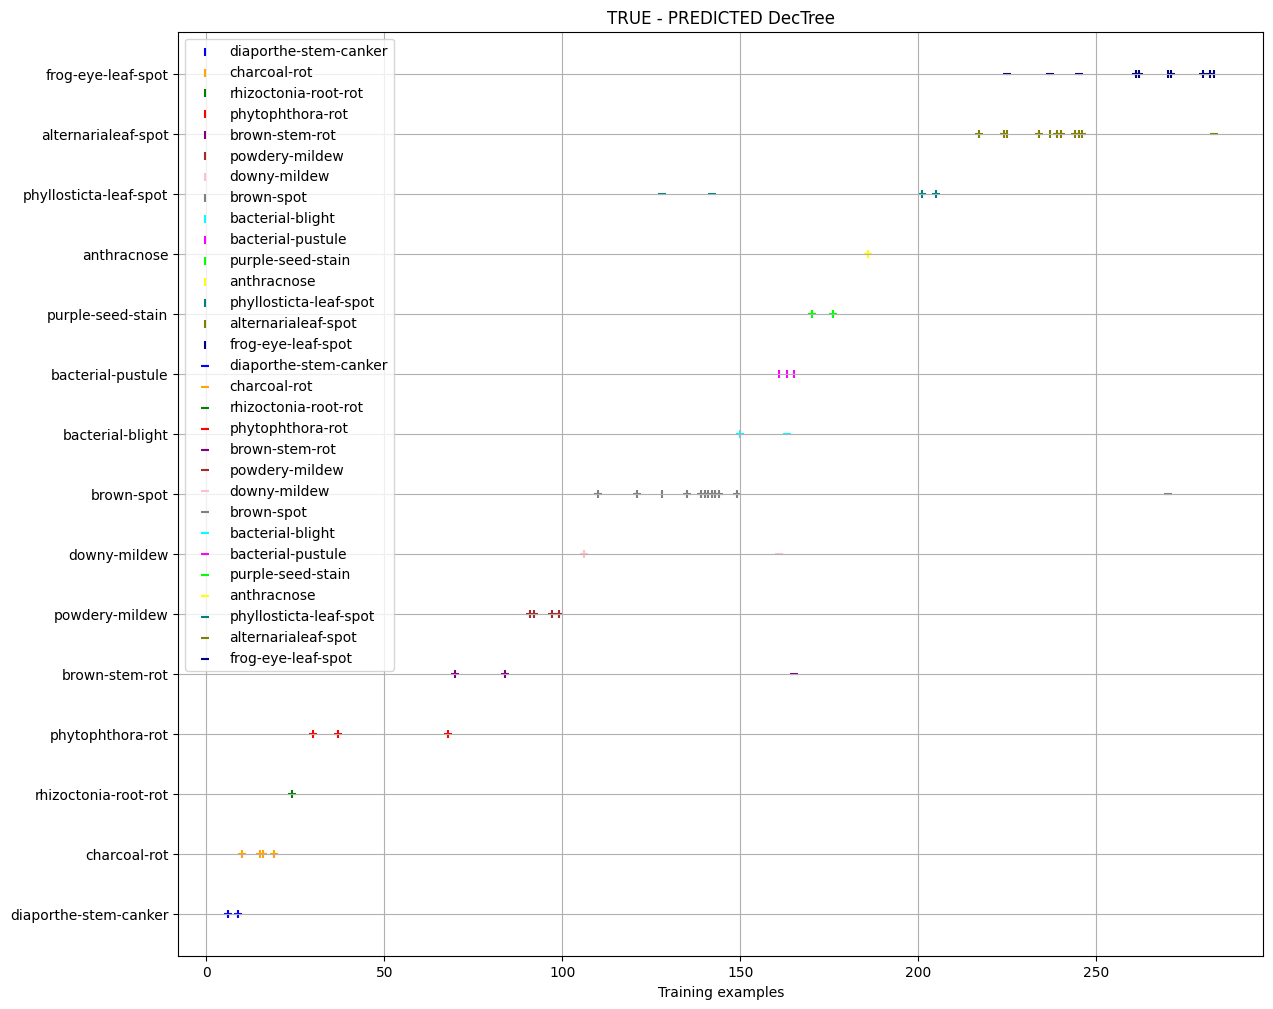

In [221]:
# Создаем DataFrame с истинными и предсказанными значениями
results = pd.DataFrame({'True': y_test, 'Predicted': y_pred_tree})

# Строим график рассеяния
plt.figure(figsize=(14, 12))
for target, color in target_colors.items():
    target_data = results[results['True'] == target]
    plt.scatter(target_data.index, target_data['True'], color=color, marker='|', label=target)

for target, color in target_colors.items():
    target_data = results[results['Predicted'] == target]
    plt.scatter(target_data.index, target_data['Predicted'], color=color, marker='_', label=target, )

plt.title('TRUE - PREDICTED DecTree')
plt.xlabel('Training examples')
plt.legend()
plt.grid()
plt.show()